In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_e10620ca820f4d14b1736291cd652394 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_e10620ca820f4d14b1736291cd652394 = 'https://s3.us.cloud-object-storage.appdomain.cloud'

client_e10620ca820f4d14b1736291cd652394 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KAwqxxqdpk_pB-soP3ov-FXX1VfpXV7Z6JFTKBmxQYE4',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_e10620ca820f4d14b1736291cd652394)

body = client_e10620ca820f4d14b1736291cd652394.get_object(Bucket='burpp-donotdelete-pr-jm9jrpcvqqoioj',Key='zomato.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
rows = df.shape[0]
columns = df.shape[1]
print("Rows : "+str(rows)+" Columns :  "+str(columns))

Rows : 51717 Columns :  17


Having 51717 rows doesn't mean that there are these much unique restaurants in the city.

In [4]:
df['name'].value_counts()

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
                     ..
Hotel Sapphire        1
Baba Bhature          1
KurryWheels           1
Fit Dish Fetish       1
Dilli Tadka           1
Name: name, Length: 8792, dtype: int64

There are 8792 unique restaurants.

In [5]:
df['name'].value_counts()[:10]

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Pizza Hut            62
Name: name, dtype: int64

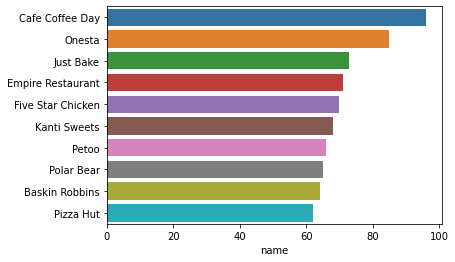

In [6]:
df_temp = df['name'].value_counts()[:10]
sns.barplot(x = df_temp , y = df_temp.index)

In [7]:
del df['url']
del df['address']
del df['phone']
del df['reviews_list']
del df['menu_item']

In [8]:
df['rate'].value_counts()
df['rate'].isnull().sum()

7775

In [9]:
# Extract rating as number from
df['rating'] = df['rate'].str.split('/',n=2,expand=True)[0]
df = df.drop('rate',axis=1)

In [10]:
del df['location']

In [11]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
votes                              0
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
rating                          7775
dtype: int64

In [12]:
df = df.rename(columns = {"approx_cost(for two people)" : "avg_cost", "listed_in(type)" : "meal_type", 
                   "listed_in(city)" : "city"})

In [13]:
df.head()

,name,online_order,book_table,votes,rest_type,dish_liked,cuisines,avg_cost,meal_type,city,rating
0,Jalsa,Yes,Yes,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari,3.7
4,Grand Village,No,No,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari,3.8


In [14]:
# Convert data type of approx cost from character to numeric
df['avg_cost'] = df['avg_cost'].str.replace(',','').apply(lambda x:float(x))

In [15]:
# make non numeric values as null
df['rating'] = df['rating'].apply(lambda x: None if x in ('NEW',None,'-') else float(x))

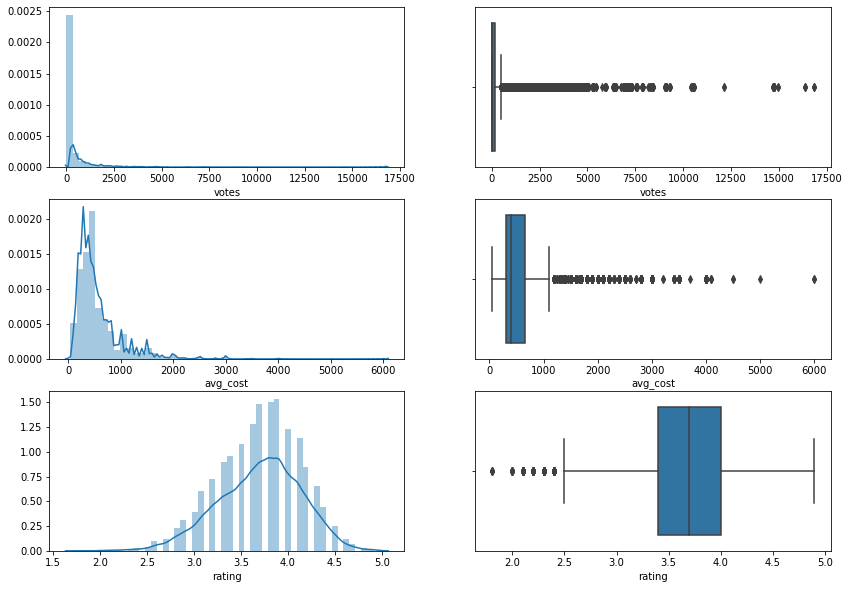

In [16]:
# Lets look at distribution of Continues variables
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
sns.distplot(df['votes'],ax=ax1)
sns.boxplot(df['votes'],ax=ax2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
sns.distplot(df['avg_cost'],ax=ax3)
sns.boxplot(df['avg_cost'],ax=ax4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.distplot(df['rating'],ax=ax5)
sns.boxplot(df['rating'],ax=ax6)

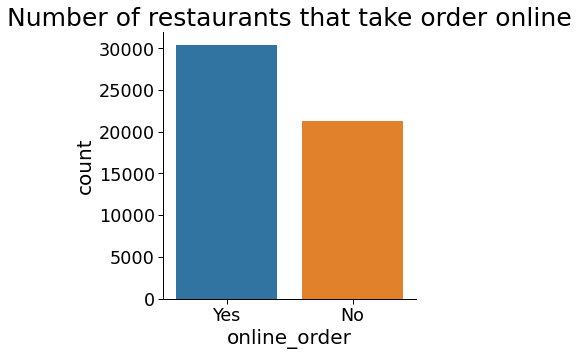

In [17]:
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
sns.catplot(data = df, kind = 'count', x = 'online_order')
plt.title('Number of restaurants that take order online')
plt.show()

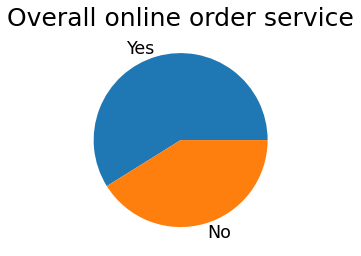

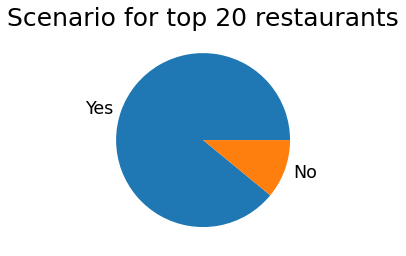

In [18]:

df_temp = df['online_order'].value_counts()
plt.pie(df_temp, labels=df_temp.index)
plt.title('Overall online order service')
plt.show()

popular_restaurant = df['name'].value_counts()[:20].index
df_popular = df[df['name'].isin(popular_restaurant)]
df_temp = df_popular['online_order'].value_counts()
plt.pie(df_temp, labels=df_temp.index)
plt.title('Scenario for top 20 restaurants')
plt.show()

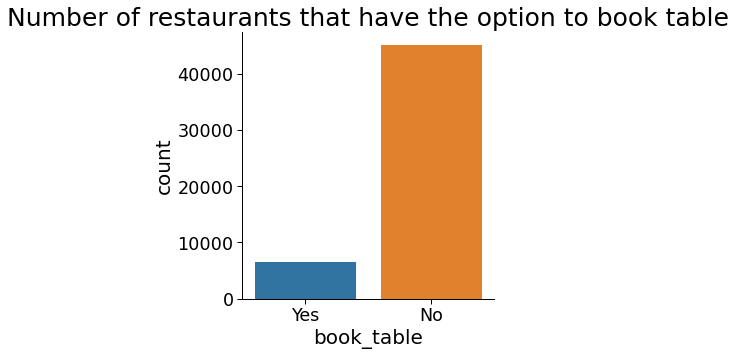

In [19]:
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})   
sns.catplot(data = df, kind = 'count', x = 'book_table')
plt.title('Number of restaurants that have the option to book table')
plt.show()

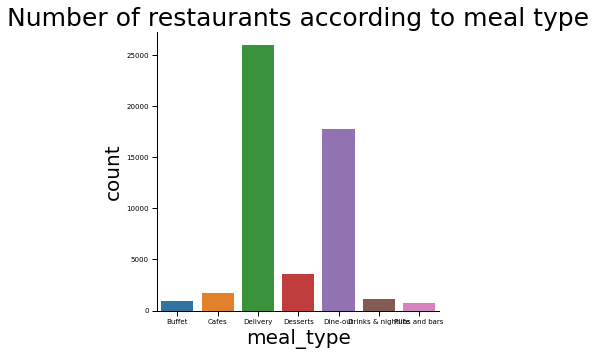

In [20]:
sns.set_context("paper", font_scale = 0.8, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
sns.catplot(data = df, kind = 'count', x = 'meal_type')
plt.title('Number of restaurants according to meal type')
plt.show()

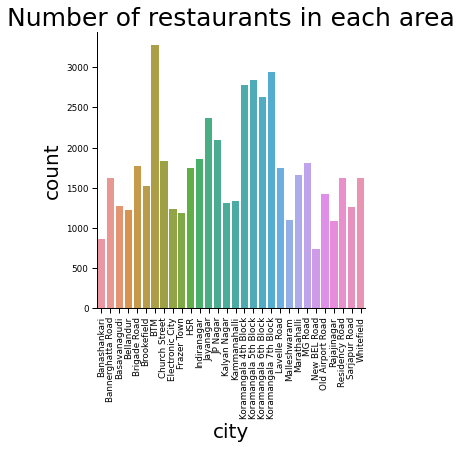

In [21]:
sns.set_context("paper", font_scale = 1, rc={"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df, kind = 'count', x = 'city')
plt.title('Number of restaurants in each area')
b.set_xticklabels(rotation = 90)
plt.show()

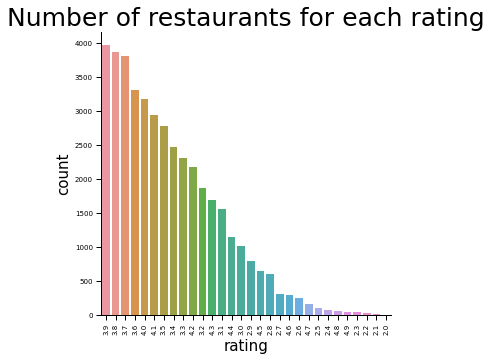

In [22]:
sns.set_context("paper", font_scale = 0.8, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 15})   
b = sns.catplot(data = df, kind = 'count', x = 'rating', order = df['rating'].value_counts().head(30).index)
plt.title('Number of restaurants for each rating')
b.set_xticklabels(rotation = 90)
plt.show()

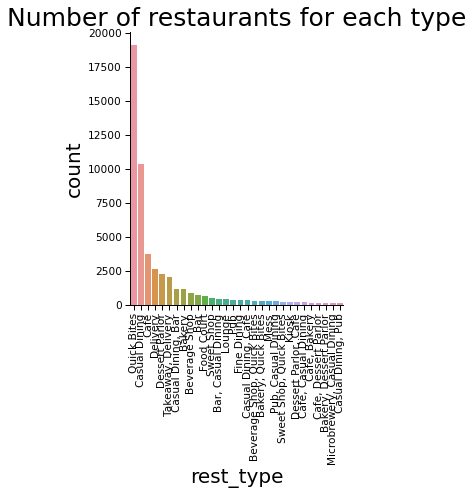

In [23]:
sns.set_context("paper", font_scale = 1.2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
b = sns.catplot(data = df, kind = 'count', x = 'rest_type', order = df['rest_type'].value_counts().head(30).index)
plt.title('Number of restaurants for each type')
b.set_xticklabels(rotation = 90)
plt.show()

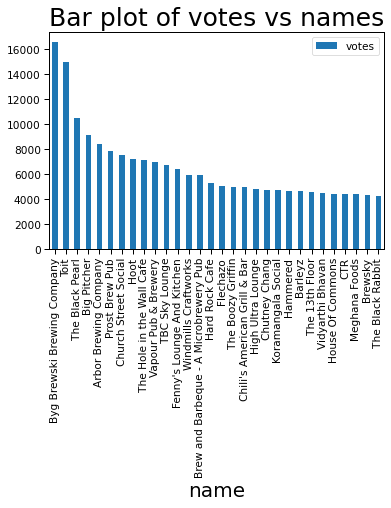

In [24]:
df[['votes', 'name']].groupby(['name']).median().sort_values("votes", ascending = False).head(30).plot.bar()
plt.title('Bar plot of votes vs names')
plt.show()

In [25]:
# finding the details of the most voted restaurant
b=[]
a = df.iloc[:, :].values
for i in range(0, len(a)):
    if a[i][0] == 'Byg Brewski Brewing Company' or a[i][0] == 'Byg Brewski Brewing Company ' or a[i][0] == ' Byg Brewski Brewing Company':
        b.append(list(a[i]))

b = pd.DataFrame(b)
b.columns = df.columns
b

,name,online_order,book_table,votes,rest_type,dish_liked,cuisines,avg_cost,meal_type,city,rating
0,Byg Brewski Brewing Company,Yes,Yes,16345,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,Delivery,Bellandur,4.9
1,Byg Brewski Brewing Company,Yes,Yes,16345,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,Dine-out,Bellandur,4.9
2,Byg Brewski Brewing Company,Yes,Yes,16345,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,Drinks & nightlife,Bellandur,4.9
3,Byg Brewski Brewing Company,Yes,Yes,16832,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,Delivery,Sarjapur Road,4.9
4,Byg Brewski Brewing Company,Yes,Yes,16832,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,Dine-out,Sarjapur Road,4.9
5,Byg Brewski Brewing Company,Yes,Yes,16832,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,Drinks & nightlife,Sarjapur Road,4.9


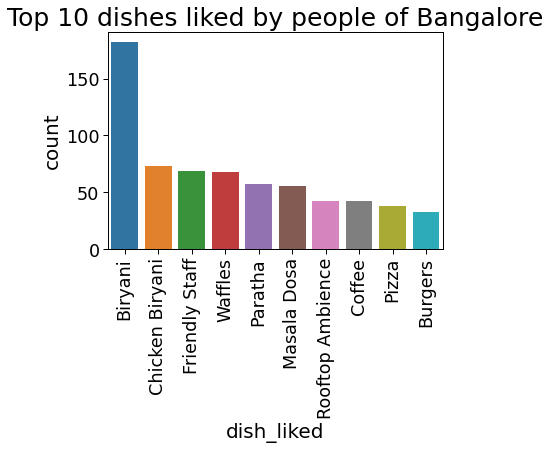

In [26]:
# plotting the top 10 dishes liked by people 
a = df.iloc[:, :].values
for i in range(0, len(a)):
    if a[i, 6] == 'Friendly Staff':
        #print(a[i, 6])
        a[i, 6] = None

a = pd.DataFrame(a)
a.columns = df.columns

sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
b = sns.countplot(data = a, x = 'dish_liked', order = a.dish_liked.value_counts().iloc[: 10].index)
b.set_xticklabels(b.get_xticklabels(),rotation = 90)
plt.title('Top 10 dishes liked by people of Bangalore')
plt.show()

In [27]:
!pip install wordcloud

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


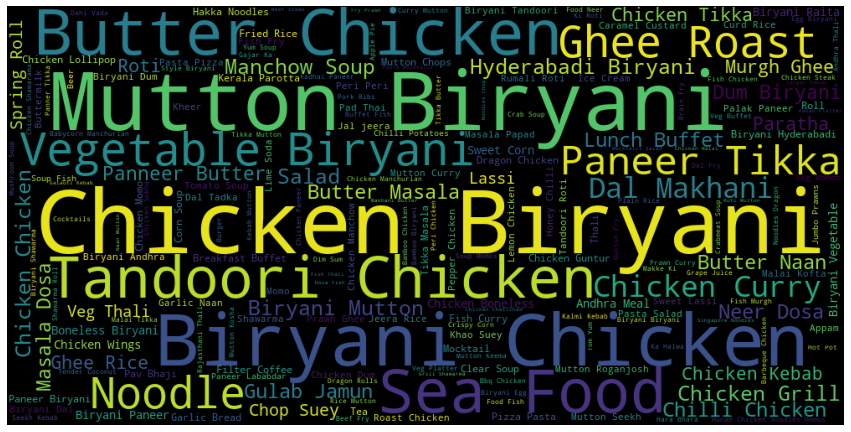

In [28]:
#This is an example of Casual Dining!
df_temp = df[df['rest_type'] == 'Casual Dining']
df_temp.head()
words = list(df_temp['dish_liked'])
word_cloud = []
for i in words:
    if(type(i) == str):
        temp = i.split(',')
        for i in temp:
            i=" ".join(i.split())
            word_cloud.append(i)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(word_cloud)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()